### Tarea 1 Matematica Aplicada

__Solución de la ecuación del calor por series de Fourier__:

$u(x,t)$: Denota la temperatura a lo largo dde la barra en la posición $x \in [0,L]$ en el instante de tiempo $t$.

\begin{equation}
\begin{cases}
\displaystyle \frac{\partial u}{\partial t}(x,t)=k^2\frac{\partial^2 u}{\partial x^2}(x,t), 
& x\in(0,L),\ t>0,\\[6pt]
u(x,0) = f(x), & x\in[0,L],\\[6pt]
u(0,t) = u(L,t)=0, \quad , &  t \geq 0.
\end{cases}
\end{equation}

nuestra función $f(x)$ está definida por:

\begin{equation}
f(x) =
\begin{cases}
\displaystyle 0 , [0,1]\\[6pt]
x-1, [1,2]\\[6pt]
-2x+5, [2,3]\\[6pt]
x-4, [3,4]\\[6pt]
0, [4,5]\\[6pt]
\end{cases}
\end{equation}

Sea $T=5$, tenemos entonces que la aproximación de $f(x)$ es:
$$f(x)=\sum_{n=1}^{\infty} b_n\sin\!\Big(\frac{2\pi n}{5}x\Big)$$

donde
$$ b_n=\frac{5}{\pi^2 n^2}\Big(-\sin\frac{2\pi n}{5}+3\sin\frac{4\pi n}{5}\Big).$$


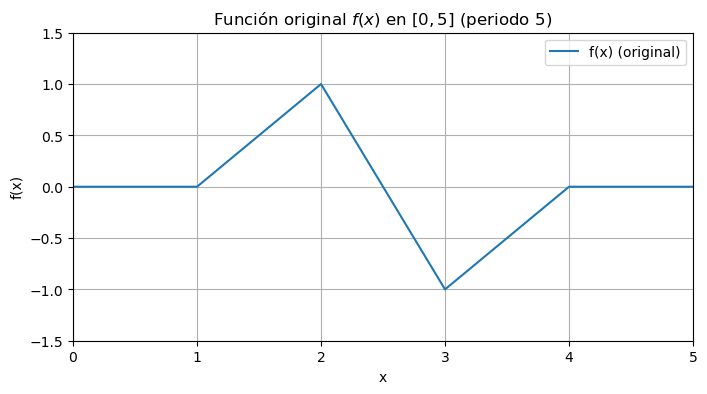

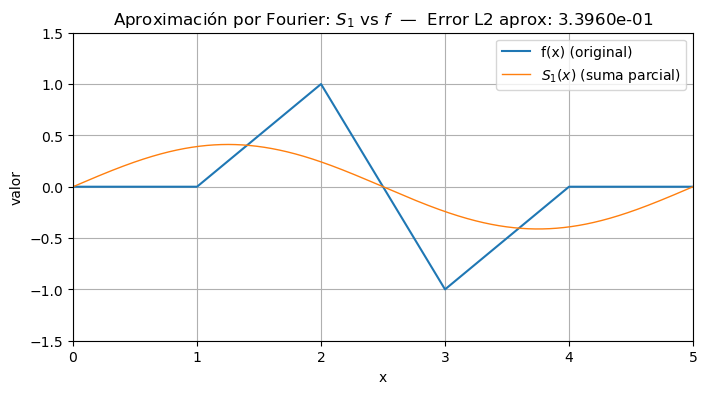

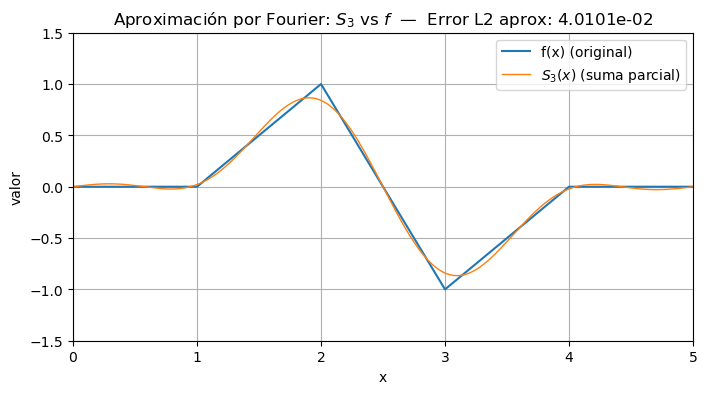

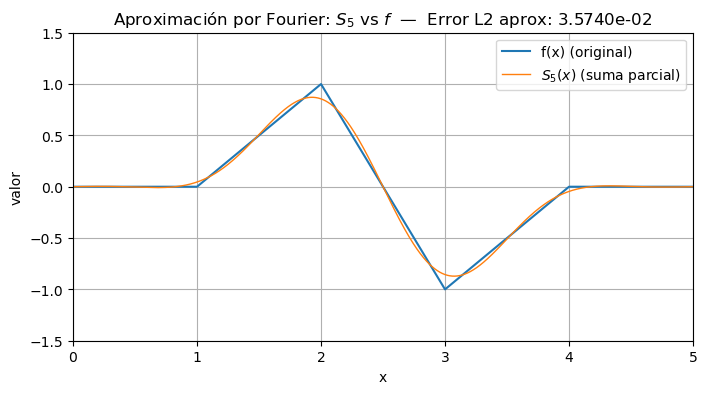

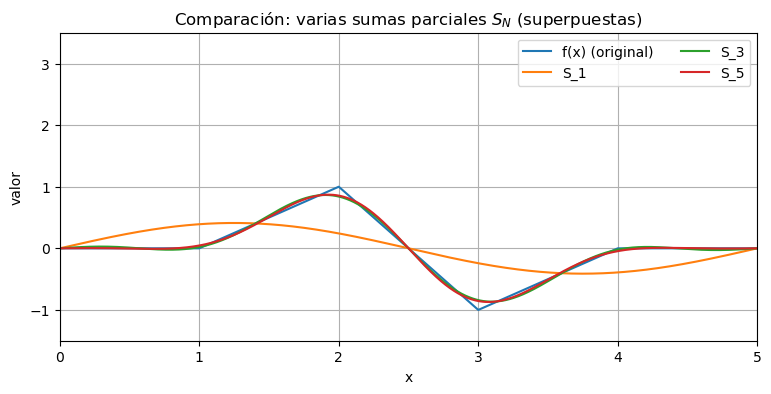

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f_periodic(x):
    # reducir a [0,5) para la periodicidad
    xp = np.mod(x, 5.0)
    y = np.zeros_like(xp)
    # 0 en [0,1]
    mask = (xp >= 0) & (xp < 1)
    y[mask] = 0.0
    # x-1 en [1,2]
    mask = (xp >= 1) & (xp < 2)
    y[mask] = xp[mask] - 1.0
    # -2x+5 en [2,3]
    mask = (xp >= 2) & (xp < 3)
    y[mask] = -2.0*xp[mask] + 5.0
    # x-4 en [3,4]
    mask = (xp >= 3) & (xp < 4)
    y[mask] = xp[mask] - 4.0
    # 0 en [4,5]
    mask = (xp >= 4) & (xp < 5)
    y[mask] = 0.0
    return y

# Parámetros
T = 5.0
omega0 = 2*np.pi / T

# Malla para mostrar la función y las aproximaciones
x_plot = np.linspace(0, 5, 2001)
f_plot = f_periodic(x_plot)

# Malla fina para integrar coeficientes con precisión
x_int = np.linspace(0, 5, 40001)
f_int = f_periodic(x_int)

# Función para calcular coeficientes b_n numéricamente
def compute_bn(n):
    integrand = f_int * np.sin(n * omega0 * x_int)
    return (2.0 / T) * np.trapz(integrand, x_int)

# Calculamos b_n hasta N_max necesario
N_max = 50  # suficiente para ver convergencia y calcular S_N hasta 20 o 50
bn = np.array([compute_bn(n) for n in range(1, N_max+1)])

# Función que construye S_N en una malla x a partir de los coeficientes bn
def partial_sum(bn_array, x):
    # bn_array debe corresponder a n=1..len(bn_array)
    N = len(bn_array)
    S = np.zeros_like(x)
    for k in range(1, N+1):
        S += bn_array[k-1] * np.sin(k * omega0 * x)
    return S

# Valores de N que queremos graficar
Ns_to_plot = [1, 3, 5]

# Grafica la función original (por separado) para referencia
plt.figure(figsize=(8,4))
plt.plot(x_plot, f_plot, label='f(x) (original)', linewidth=1.5)
plt.title('Función original $f(x)$ en $[0,5]$ (periodo 5)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(0,5)
plt.ylim(min(f_plot)-0.5, max(f_plot)+0.5)
plt.grid(True)
plt.legend()
plt.show()

# Graficar S_N superpuesto con la función original en figuras separadas
for N in Ns_to_plot:
    bn_used = bn[:N]
    S_N = partial_sum(bn_used, x_plot)
    # Calcular error L2 (aprox) en la malla
    error_L2 = np.sqrt(np.trapz((f_plot - S_N)**2, x_plot) / (x_plot[-1] - x_plot[0]))
    plt.figure(figsize=(8,4))
    plt.plot(x_plot, f_plot, label='f(x) (original)', linewidth=1.5)
    plt.plot(x_plot, S_N, label=f'$S_{{{N}}}(x)$ (suma parcial)', linewidth=1.0)
    plt.title(f'Aproximación por Fourier: $S_{{{N}}}$ vs $f$  —  Error L2 aprox: {error_L2:.4e}')
    plt.xlabel('x')
    plt.ylabel('valor')
    plt.xlim(0,5)
    plt.ylim(min(f_plot.min(), S_N.min())-0.5, max(f_plot.max(), S_N.max())+0.5)
    plt.grid(True)
    plt.legend()
    plt.show()

plt.figure(figsize=(9,4))
plt.plot(x_plot, f_plot, label='f(x) (original)', linewidth=1.5)
for N in [1,3,5]:
    plt.plot(x_plot, partial_sum(bn[:N], x_plot), label=f'S_{N}')
plt.title('Comparación: varias sumas parciales $S_N$ (superpuestas)')
plt.xlabel('x')
plt.ylabel('valor')
plt.xlim(0,5)
plt.ylim(min(f_plot.min(), -1)-0.5, max(f_plot.max(), 3)+0.5)
plt.grid(True)
plt.legend(ncol=2)
plt.show()

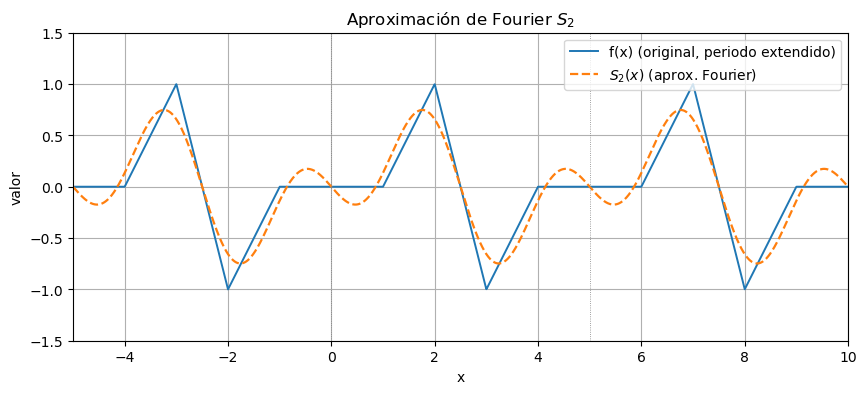

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- tu definición de f_periodic, T, omega0, computación de bn y partial_sum ---
def f_periodic(x):
    xp = np.mod(x, 5.0)
    y = np.zeros_like(xp)
    mask = (xp >= 0) & (xp < 1)
    y[mask] = 0.0
    mask = (xp >= 1) & (xp < 2)
    y[mask] = xp[mask] - 1.0
    mask = (xp >= 2) & (xp < 3)
    y[mask] = -2.0*xp[mask] + 5.0
    mask = (xp >= 3) & (xp < 4)
    y[mask] = xp[mask] - 4.0
    mask = (xp >= 4) & (xp < 5)
    y[mask] = 0.0
    return y

T = 5.0
omega0 = 2*np.pi / T

x_int = np.linspace(0, T, 40001)
f_int = f_periodic(x_int)

def compute_bn(n):
    integrand = f_int * np.sin(n * omega0 * x_int)
    return (2.0 / T) * np.trapz(integrand, x_int)

N_max = 50
bn = np.array([compute_bn(n) for n in range(1, N_max+1)])

def partial_sum(bn_array, x):
    S = np.zeros_like(x)
    for k in range(1, len(bn_array)+1):
        S += bn_array[k-1] * np.sin(k * omega0 * x)
    return S

extra_periods = 1     # periodos
N_plot = 2             # terminos
num_pts = 4001

x_ext = np.linspace(-extra_periods*T, (1+extra_periods)*T, num_pts)  # extensión simétrica alrededor de [0,T]
f_ext = f_periodic(x_ext)
S_ext = partial_sum(bn[:N_plot], x_ext)

# gráfica
plt.figure(figsize=(10,4))
plt.plot(x_ext, f_ext, label='f(x) (original, periodo extendido)', linewidth=1.4, color='tab:blue')
plt.plot(x_ext, S_ext, label=f'$S_{{{N_plot}}}(x)$ (aprox. Fourier)', linewidth=1.6, linestyle='--', color='tab:orange')

# opcional: marcar fronteras de periodos para facilitar visualización
for m in range(int(np.floor(x_ext[0]/T))-1, int(np.ceil(x_ext[-1]/T))+2):
    plt.axvline(m*T, color='gray', linestyle=':', linewidth=0.6)

plt.title(f'Aproximación de Fourier $S_{{{N_plot}}}$')
plt.xlabel('x')
plt.ylabel('valor')
plt.xlim(x_ext[0], x_ext[-1])
ymin = min(f_ext.min(), S_ext.min()) - 0.5
ymax = max(f_ext.max(), S_ext.max()) + 0.5
plt.ylim(ymin, ymax)
plt.grid(True)
plt.legend()
plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import os

# --- Definición de la función f ---
def f_on_0_5(x):
    x = np.asarray(x)
    xp = x.copy()
    # x en [0,5]
    y = np.zeros_like(xp, dtype=float)
    # intervalos
    mask = (xp >= 0) & (xp < 1)
    y[mask] = 0.0
    mask = (xp >= 1) & (xp < 2)
    y[mask] = xp[mask] - 1.0
    mask = (xp >= 2) & (xp < 3)
    y[mask] = -2.0*xp[mask] + 5.0
    mask = (xp >= 3) & (xp < 4)
    y[mask] = xp[mask] - 4.0
    mask = (xp >= 4) & (xp <= 5) 
    y[mask] = 0.0
    return y


# --- Parámetros ---
L = 5.0           # Longitud del dominio
k = 1.0           # Coeficiente de difisuón termica
Nterms = 10     # Cantidad de terminos
nx = 400          # Cantidad de puntos espaciales para graficar
x = np.linspace(0, L, nx)
f_x = f_on_0_5(x)

# Malla para integrar
x_int = np.linspace(0, L, 20001)
f_int = f_on_0_5(x_int)

# Calculo del coeficiente B_n
def compute_Bn(n):
    integrand = f_int * np.sin(n * np.pi * x_int / L)
    return (2.0 / L) * np.trapz(integrand, x_int)

B = np.array([compute_Bn(n) for n in range(1, Nterms+1)])  # shape (Nterms,)

# Calculo para el seno
n_vec = np.arange(1, Nterms+1)
sin_basis = np.sin(np.outer(n_vec * np.pi / L, x))  # shape (Nterms, nx)

# Calculo de u(x,t) y ir sumando
def u_xt(t):
    # exponential decay factors for each n at time t
    decay = np.exp(- (n_vec * np.pi * k / L)**2 * t)  # shape (Nterms,)
    u = (B * decay)[:, None] * sin_basis  # (Nterms, nx)
    return u.sum(axis=0)

# Para la animación
t_max = 0.9      # Tiempo máximo
frames = 120     # fotogramas
t_vals = np.linspace(0, t_max, frames)


fig, ax = plt.subplots(figsize=(8,4))
line_u, = ax.plot([], [], lw=1.5, label='u(x,t)')
line_f, = ax.plot(x, f_x, lw=1.0, linestyle='--', label='f(x) (initial)')  
ax.set_xlim(0, L)
ymin = min(f_x.min(), -1.2)
ymax = max(f_x.max(), 1.2)
ax.set_ylim(ymin-0.1, ymax+0.1)
ax.set_xlabel('x')
ax.set_ylabel('u(x,t)')
ax.set_title('Ecuación del calor 1D: evolución de u(x,t)')
ax.grid(True)
ax.legend()

def init():
    line_u.set_data([], [])
    return (line_u,)

def animate(i):
    t = t_vals[i]
    u = u_xt(t)
    line_u.set_data(x, u)
    ax.set_title(f'Ecuación del calor 1D — t = {t:.4f}')
    return (line_u,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=50, blit=True)

# --- Guardar animación ---
out_path_mp4 = "animacion.mp4"
out_path_gif = "animacion.gif"
saved_path = None

# Try to save as mp4 with ffmpeg; if fails, fallback to GIF
try:
    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=30, bitrate=2000)
    anim.save(out_path_mp4, writer=writer)
    saved_path = out_path_mp4
except Exception as e_mp4:
    try:
        from matplotlib.animation import PillowWriter
        writer = PillowWriter(fps=30)
        anim.save(out_path_gif, writer=writer)
        saved_path = out_path_gif
    except Exception as e_gif:
        saved_path = None
        print("No se pudo guardar la animación automatiquement (faltan encoders).")
        print("Errores:", e_mp4, e_gif)

plt.close(fig)  


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import os

# ------------------------------
# Definición de la función en [0,5] y su extensión periódica
# ------------------------------
def f_on_0_5(x):
    x = np.asarray(x)
    xp = x.copy()
    y = np.zeros_like(xp, dtype=float)
    mask = (xp >= 0) & (xp < 1)
    y[mask] = 0.0
    mask = (xp >= 1) & (xp < 2)
    y[mask] = xp[mask] - 1.0
    mask = (xp >= 2) & (xp < 3)
    y[mask] = -2.0*xp[mask] + 5.0
    mask = (xp >= 3) & (xp < 4)
    y[mask] = xp[mask] - 4.0
    mask = (xp >= 4) & (xp <= 5)
    y[mask] = 0.0
    return y

def f_periodic(x):
    # reduce x al intervalo [0,5) y evalúa f_on_0_5
    xp = np.mod(x, 5.0)
    return f_on_0_5(xp)

# ------------------------------
# Parámetros físicos y numéricos
# ------------------------------
L = 5.0           # longitud del dominio para la ED (y periodo T)
k = 1.0           # coeficiente k en u_t = k^2 u_xx
T = L
omega0 = 2.0 * np.pi / T

# parámetros para la animación / discretización
Nterms_heat = 40        # número de términos para la solución de la ED (B_n)
N_max_bn = 50           # máximo de términos para la serie periódica (bn)
nx = 400                # puntos en x para la ED
x = np.linspace(0, L, nx)
f_x = f_on_0_5(x)

# dominio para integrar con alta resolución (para calcular coeficientes)
x_int = np.linspace(0, L, 40001)
f_int = f_on_0_5(x_int)

# ------------------------------
# Coeficientes B_n para la solución con condiciones de Dirichlet (seno n*pi x/L)
# B_n = (2/L) * ∫_0^L f(x) sin(n*pi*x/L) dx
# ------------------------------
def compute_Bn(n):
    integrand = f_int * np.sin(n * np.pi * x_int / L)
    return (2.0 / L) * np.trapz(integrand, x_int)

n_vec_heat = np.arange(1, Nterms_heat+1)
B = np.array([compute_Bn(n) for n in n_vec_heat])  # shape (Nterms_heat,)

# precomputar la base seno para la ED en los puntos x
sin_basis_heat = np.sin(np.outer(n_vec_heat * np.pi / L, x))  # (Nterms_heat, nx)

def u_xt(t):
    decay = np.exp(- (n_vec_heat * np.pi * k / L)**2 * t)  # k^2 *(nπ/L)^2 * t en exponencial
    u = (B * decay)[:, None] * sin_basis_heat  # (Nterms_heat, nx)
    return u.sum(axis=0)

# ------------------------------
# Coeficientes bn para la serie periódica (periodo T=5):
# bn = (2/T) * ∫_0^T f(x) sin(n*omega0*x) dx
# ------------------------------
x_int_p = np.linspace(0, T, 40001)
f_int_p = f_periodic(x_int_p)

def compute_bn(n):
    integrand = f_int_p * np.sin(n * omega0 * x_int_p)
    return (2.0 / T) * np.trapz(integrand, x_int_p)

n_vec_bn = np.arange(1, N_max_bn+1)
bn = np.array([compute_bn(n) for n in n_vec_bn])

# dominio extendido para visualizar varios periodos
extra_periods = 1
num_pts = 4001
x_ext = np.linspace(-extra_periods*T, (1+extra_periods)*T, num_pts)
f_ext = f_periodic(x_ext)

# precomputar base seno para bn sobre x_ext para eficiencia en la animación
sin_basis_bn_ext = np.sin(np.outer(n_vec_bn * omega0, x_ext))  # (N_max_bn, num_pts)

def partial_sum_from_coeffs(bn_array, sin_basis_subset):
    # bn_array shape (m,), sin_basis_subset shape (m, num_pts)
    return (bn_array[:, None] * sin_basis_subset).sum(axis=0)

# ------------------------------
# Configuración de animación: dos paneles
# ------------------------------
t_max = 0.9      # tiempo máximo para la animación de la ED
frames = 120
t_vals = np.linspace(0, t_max, frames)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 8), gridspec_kw={'height_ratios':[1,1]})
plt.tight_layout(pad=3.0)

# --- Ax1: u(x,t) (solución calor en [0,L]) ---
line_u, = ax1.plot([], [], lw=1.8, label='u(x,t)')
line_f0, = ax1.plot(x, f_x, lw=1.0, linestyle='--', label='f(x) (cond. inicial)')
ax1.set_xlim(0, L)
ymin = min(f_x.min(), -1.2)
ymax = max(f_x.max(), 1.2)
ax1.set_ylim(ymin-0.1, ymax+0.1)
ax1.set_xlabel('x')
ax1.set_ylabel('u(x,t)')
ax1.set_title('Ecuación del calor 1D: evolución de u(x,t)')
ax1.grid(True)
ax1.legend(loc='upper right')

# --- Ax2: S_N(x) vs f_periodic (muestra varios periodos) ---
line_S, = ax2.plot([], [], lw=1.6, linestyle='--', label='S_N(x) (suma parcial)')
line_fext, = ax2.plot(x_ext, f_ext, lw=1.2, label='f(x) (periodic)')
ax2.set_xlim(x_ext[0], x_ext[-1])
ymin2 = min(f_ext.min(), -1.2)
ymax2 = max(f_ext.max(), 1.2)
ax2.set_ylim(ymin2-0.2, ymax2+0.2)
ax2.set_xlabel('x')
ax2.set_ylabel('valor')
ax2.set_title('Suma parcial de Fourier periódica (N baja -> alta)')
ax2.grid(True)
ax2.legend(loc='upper right')

# marcar fronteras de periodo para facilitar la lectura
for m in range(int(np.floor(x_ext[0]/T))-1, int(np.ceil(x_ext[-1]/T))+2):
    ax2.axvline(m*T, color='gray', linestyle=':', linewidth=0.6)

def init():
    line_u.set_data([], [])
    line_S.set_data([], [])
    return (line_u, line_S)

def animate(i):
    # tiempo para la ED
    t = t_vals[i]
    u = u_xt(t)
    line_u.set_data(x, u)

    # número de términos N que mostraremos en el panel de Fourier (de 1 a N_max_bn)
    N_current = 1 + int(i * (N_max_bn - 1) / (frames - 1))
    # suma parcial con los primeros N_current términos (usando las bases precomputadas)
    S_ext = partial_sum_from_coeffs(bn[:N_current], sin_basis_bn_ext[:N_current])
    line_S.set_data(x_ext, S_ext)

    # actualizar títulos/etiquetas
    ax1.set_title(f'Ecuación del calor 1D — t = {t:.4f}   (N_terms_heat={Nterms_heat})')
    ax2.set_title(f'Suma parcial periódica $S_{{N}}(x)$ — N = {N_current} / {N_max_bn}')
    return (line_u, line_S)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=60, blit=True)

# ------------------------------
# Guardar animación (mp4 con ffmpeg si está disponible, si no GIF con Pillow)
# ------------------------------
out_path_mp4 = "animacion_calor_y_fourier.mp4"
out_path_gif = "animacion_calor_y_fourier.gif"
saved_path = None

try:
    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=5, bitrate=2000)
    anim.save(out_path_mp4, writer=writer)
    saved_path = out_path_mp4
    print("Animación guardada en:", saved_path)
except Exception as e_mp4:
    try:
        from matplotlib.animation import PillowWriter
        writer = PillowWriter(fps=5)
        anim.save(out_path_gif, writer=writer)
        saved_path = out_path_gif
        print("Animación guardada en:", saved_path)
    except Exception as e_gif:
        saved_path = None
        print("No se pudo guardar la animación automáticamente (faltan encoders).")
        print("Errores:", e_mp4, e_gif)

plt.close(fig)


Animación guardada en: animacion_calor_y_fourier.gif
